# 1. Regression

## 1.1. Load Data and Train Model

In [1]:
from sklearn.linear_model import LinearRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import mean_squared_error

dataset = load_dataset('us_crime')
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['test']
test = dataset['test']

model = LinearRegression()
model.fit(train['X'], train['y'])

mean_squared_error(test['y'], model.predict(test['X']))

np.float64(0.013731416251044857)

In [7]:
from holisticai.explainability.metrics import regression_explainability_metrics
from holisticai.utils.feature_importances import compute_surrogate_feature_importance
from holisticai.utils.inspection import compute_partial_dependence
from holisticai.utils import RegressionProxy

proxy = RegressionProxy(predict=model.predict)

importances  = compute_surrogate_feature_importance(proxy=proxy, X=train['X'], y=train['y'])

ranked_importances = importances.top_alpha(0.8)

partial_dependencies = compute_partial_dependence(train['X'], features=ranked_importances.feature_names, proxy=proxy)

conditional_importances  = compute_surrogate_feature_importance(proxy=proxy, X=train['X'], y=train['y'], conditional=True)

y_pred = proxy.predict(train['X'])

regression_explainability_metrics(importances, partial_dependencies, conditional_importances, train['X'], y_pred)

,metric,value,reference
0,Alpha Importance Score,0.009901,0.0
1,XAI Ease Score,1.000000,1.0
2,Position Parity,0.500000,1.0
3,Rank Alignment,0.500000,1.0
4,Spread Ratio,0.126870,0.0
5,Spread Divergence,0.054093,0.0
6,Surrogate Accuracy Score,0.007340,1.0


<Axes: >

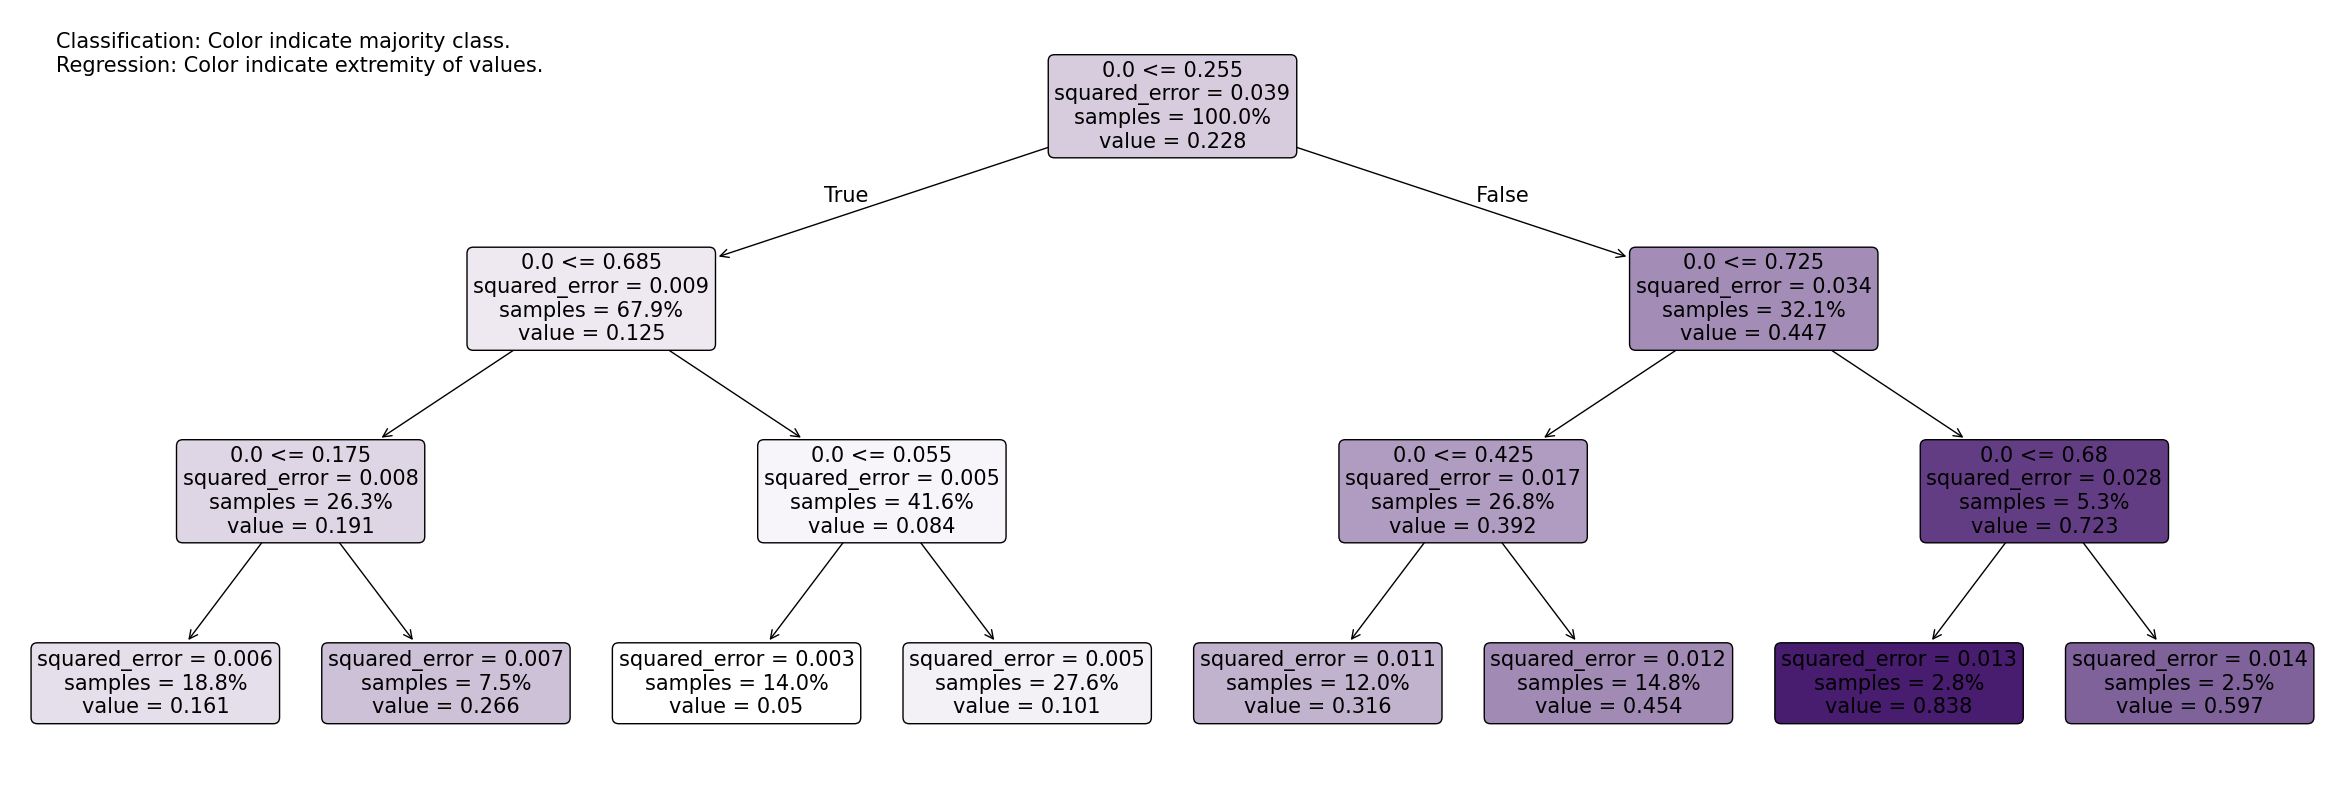

In [8]:
from holisticai.explainability.plots import plot_surrogate

plot_surrogate(importances)

# 3. Classification

In [9]:
from sklearn.linear_model import LogisticRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import accuracy_score

dataset = load_dataset('adult')
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['test']
test = dataset['test']

model = LogisticRegression()
model.fit(train['X'], train['y'])

accuracy_score(test['y'], model.predict(test['X']))

0.7957987838584853

In [10]:
from holisticai.explainability.metrics import classification_explainability_metrics
from holisticai.utils import BinaryClassificationProxy
from holisticai.utils.feature_importances import compute_surrogate_feature_importance
from holisticai.utils.inspection import compute_partial_dependence

proxy = BinaryClassificationProxy(predict=model.predict, predict_proba=model.predict_proba, classes=model.classes_)

importances  = compute_surrogate_feature_importance(X=train['X'], y=train['y'], proxy=proxy)

ranked_importances = importances.top_alpha(0.8)

partial_dependencies = compute_partial_dependence(train['X'], features=ranked_importances.feature_names, proxy=proxy)

conditional_importances  = compute_surrogate_feature_importance(X=train['X'], y=train['y'], proxy=proxy, conditional=True)

y_pred = proxy.predict(train['X'])

classification_explainability_metrics(importances, partial_dependencies, conditional_importances, train['X'], y_pred)

,metric,value,reference
0,Alpha Importance Score,0.010309,0.0
1,XAI Ease Score,0.750000,1.0
2,Position Parity,1.000000,1.0
3,Rank Alignment,1.000000,1.0
4,Spread Ratio,0.177945,0.0
5,Spread Divergence,0.048361,0.0
6,Surrogate Accuracy Score,0.989276,1.0


<Axes: >

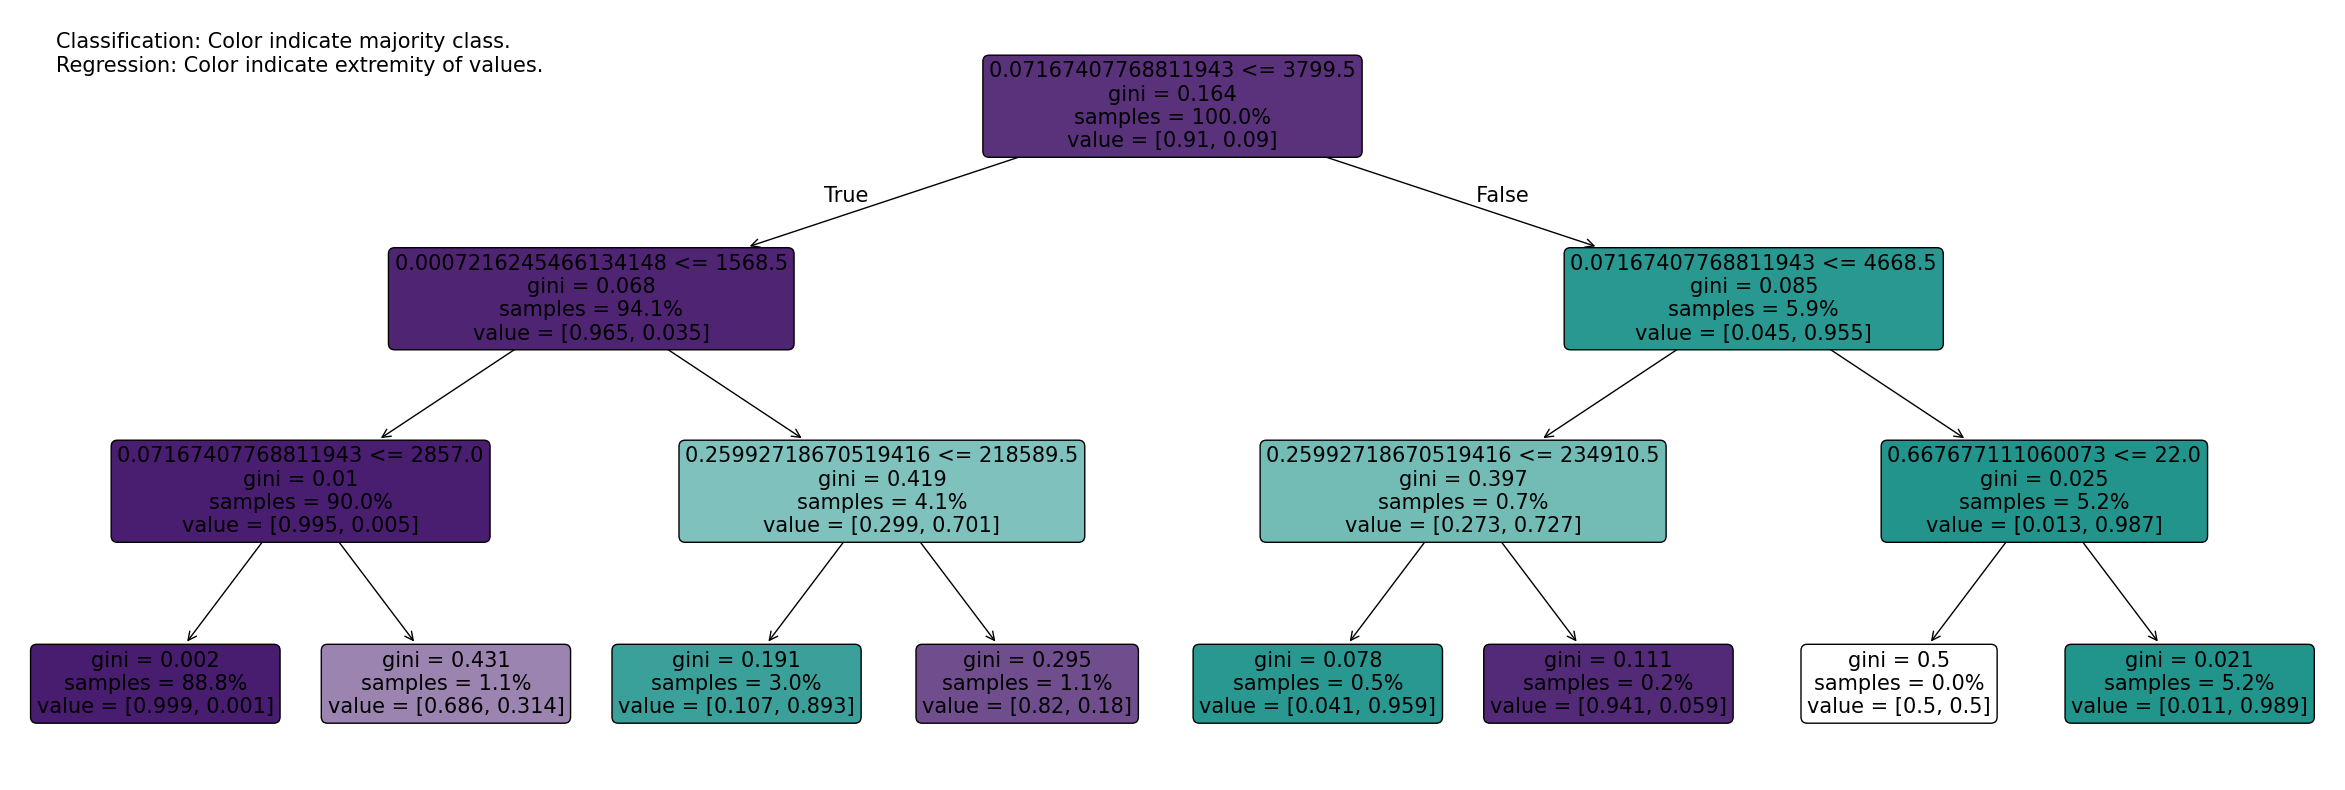

In [11]:
from holisticai.explainability.plots import plot_surrogate

plot_surrogate(importances)

# Multi Classification

In [12]:
from sklearn.linear_model import LogisticRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import accuracy_score

dataset = load_dataset(dataset_name="student_multiclass")
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['test']
test = dataset['test']

model = LogisticRegression()
model.fit(train['X'], train['y'])

accuracy_score(test['y'], model.predict(test['X']))

0.810126582278481

In [13]:
from holisticai.explainability.metrics import multiclass_explainability_metrics
from holisticai.utils import MultiClassificationProxy
from holisticai.utils.feature_importances import compute_surrogate_feature_importance
from holisticai.utils.inspection import compute_partial_dependence

proxy = MultiClassificationProxy(predict=model.predict, predict_proba=model.predict_proba, classes=model.classes_)

importances  = compute_surrogate_feature_importance(X=train['X'], y=train['y'], proxy=proxy)

ranked_importances = importances.top_alpha(0.8)

partial_dependencies = compute_partial_dependence(train['X'], features=ranked_importances.feature_names, proxy=proxy)

conditional_importances  = compute_surrogate_feature_importance(X=train['X'], y=train['y'], proxy=proxy, conditional=True)

y_pred = proxy.predict(train['X'])

multiclass_explainability_metrics(importances, partial_dependencies, conditional_importances, train['X'], y_pred)

,metric,value,reference
0,Alpha Importance Score,0.115385,0.0
1,XAI Ease Score,0.888889,1.0
2,Position Parity,0.203704,1.0
3,Rank Alignment,0.240741,1.0
4,Spread Ratio,0.461914,0.0
5,Spread Divergence,0.204272,0.0
6,Surrogate Accuracy Score,0.873418,1.0


<Axes: >

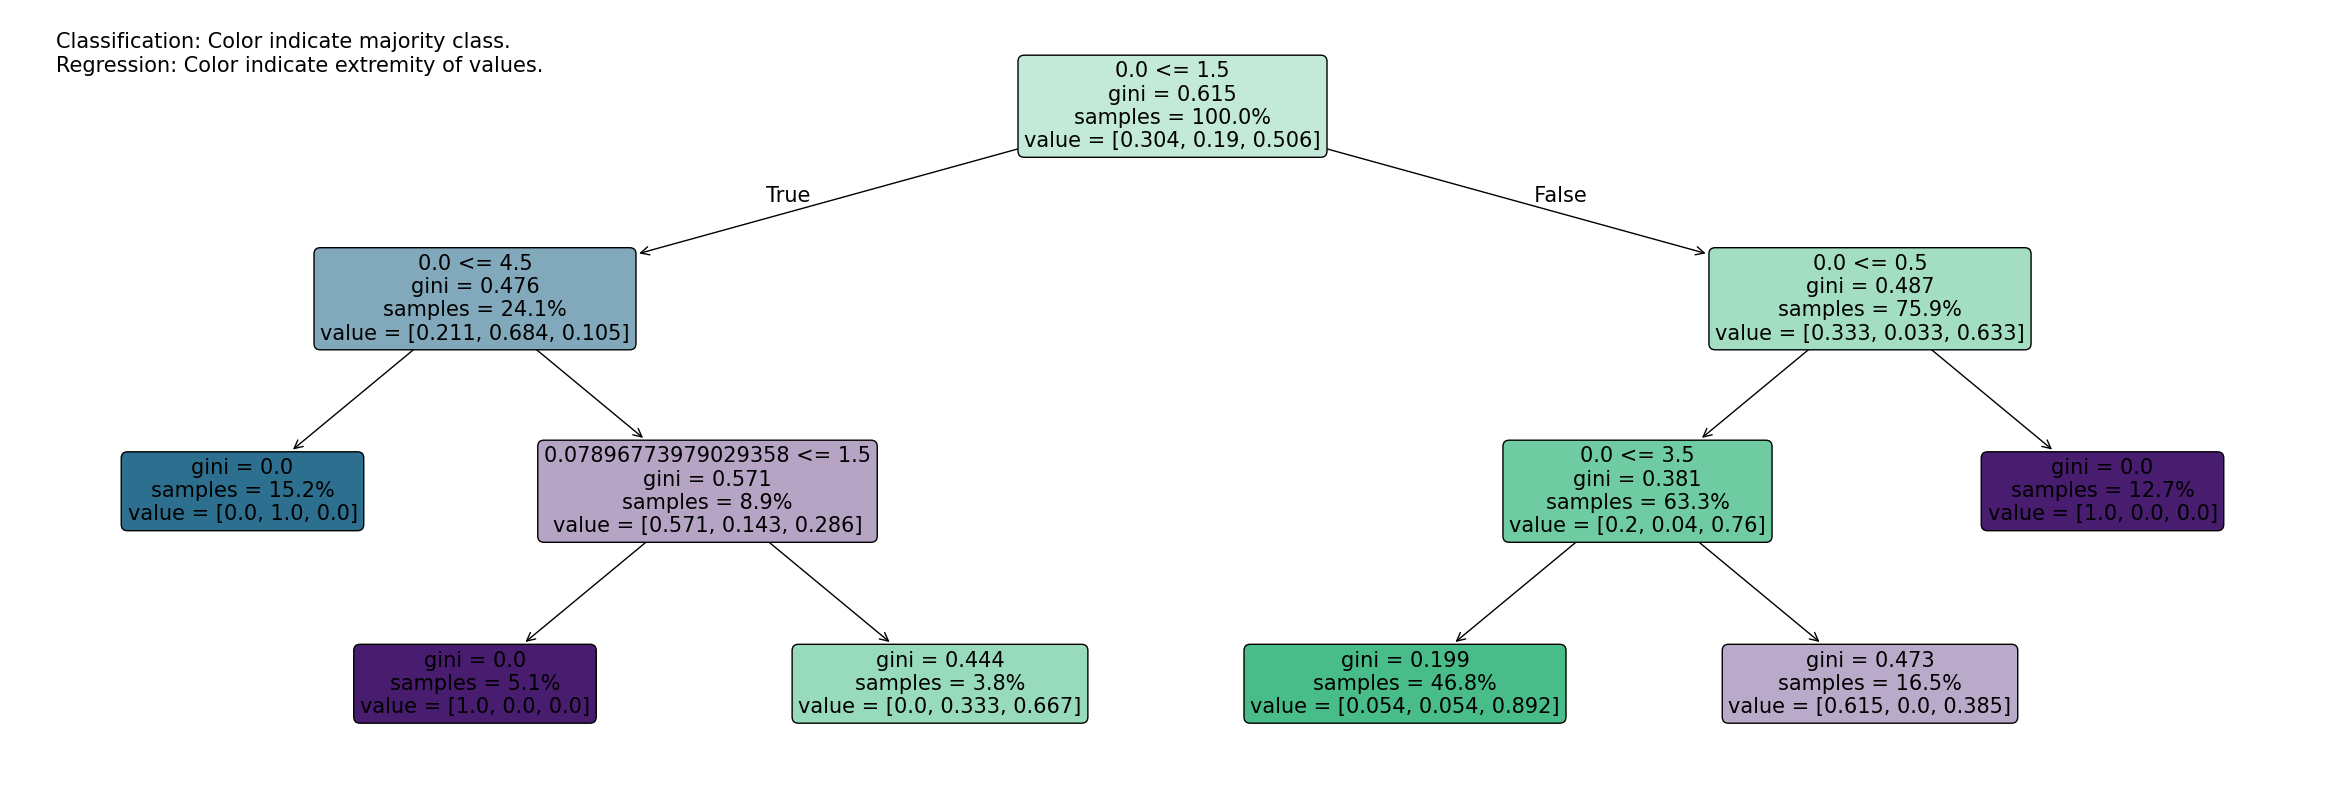

In [14]:
from holisticai.explainability.plots import plot_surrogate

plot_surrogate(importances)